<a href="https://colab.research.google.com/github/victor-hro/drug-discovery/blob/master/drug_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [2]:
url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
data = pd.read_csv(url, compression='zip')

# Extração de informações

**1. Sobre o dataframe:**
1. Cada linha presente no dataframe é uma cultura de células.
2. células tem tempo de vida, se dividem até 40~60 vezes, depois começam a morrer. O câncer consegue se replicar indefinidamente.
3. as células presentes neste dataframe foram coletadas por uma linhagem de uma mulher, coletadas em 1950 e vivem até hoje. A vacina da poliomielite foi feita à partir delas.

**1.1. Tipos de tratamento:**

- com droga: células sob efeito de manipulações.

- com controle: células em condições normais.

**1.2. Tempo:** após cultivar as células, será aplicada a droga e analisada após de 24, 48, 72 horas, permitindo analisar até qual tempo surge o efeito de reação da droga.

**1.3. Dose:** tipos de dose aplicadas nas culturas. Sem afirmação sobre a concentração de cada tipo.

**1.3. c-x:** o conjunto de células é submetido a um composto, a variável 'c' informa quantas células sobreviveram ao tratamento.

**1.4. g-x:** expressões - fator multiplicador referente a quantos RNAs serão produzidos pelo gene - de cada gene relacionada a droga ou a dose. Há drogas que aumentam a expressão do gene e drogas que diminuem a expressão. As células controle são nossas referências.
**Todos os dados estão normalizados**.


A membrana citoplasmática separa o interior da célula do exterior. Dentro da célula temos o núcleo. Dentro do núcleo temos o DNA, com toda as informações genéticas do ser humano


Dentro do DNA temos os genes, que são porçõs do DNA com a receita para sintetizar a proteína. A proteína é sintetizada fora do núcleo, que é carregada pelo RNA mensageiro. Em condições normais, a célula produz 4 RNAs (expresão gênica = 1x). 


Sob algum estímulo, como drogas, luz, ph, a expressão genética pode aumentar ou diminuir.



In [ ]:
print('shape:', data.shape)
data.head()

shape: (23814, 877)


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Modificando o nome das colunas

In [ ]:
data.rename({'droga': 'composto'}, axis=1, inplace=True)

In [ ]:
data.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

<center> informações dos pacientes controle e com droga

In [ ]:
data.groupby('tratamento').count()

,id,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
tratamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
com_controle,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,...,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866
com_droga,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,...,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948


<center> informações de tempo

In [ ]:
data.groupby('tempo').count()

,id,tratamento,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
tempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,...,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772
48,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,...,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250
72,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,...,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792


In [ ]:
data.composto.nunique()

3289

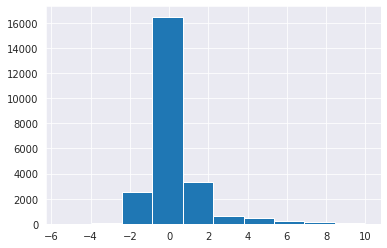

In [ ]:
data['g-0'].hist()

Por quê a classe tratamento é tão desbalanceada? as doses e o tempo também estão desbalanceados?

<center>Proporção de classes:

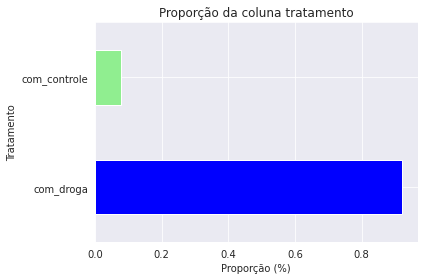

In [ ]:
data.tratamento.value_counts(normalize=True).plot.barh(
    color=['blue', 'lightgreen'], title='Proporção da coluna tratamento')
plt.xlabel('Proporção (%)')
plt.ylabel('Tratamento')
plt.tight_layout()

<center>Proporção de doses:

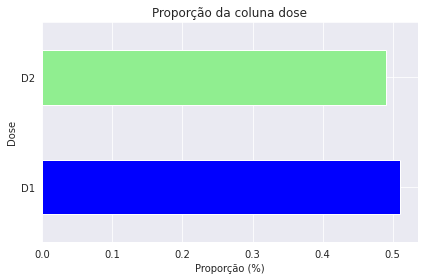

In [ ]:
data.dose.value_counts(normalize=True).plot.barh(
    color=['blue', 'lightgreen'], title='Proporção da coluna dose')
plt.xlabel('Proporção (%)')
plt.ylabel('Dose')
plt.tight_layout()

<center>Proporção do tempo:

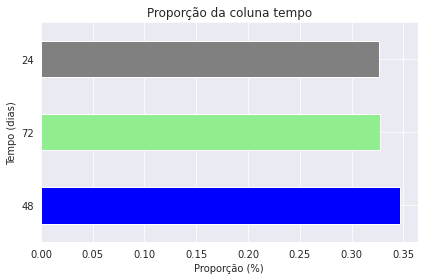

In [ ]:
data.tempo.value_counts(normalize=True).plot.barh(
    color=['blue', 'lightgreen', 'gray'], title='Proporção da coluna tempo')
plt.xlabel('Proporção (%)')
plt.ylabel('Tempo (dias)')
plt.tight_layout()

<center>Quantos tipos de drogas foram investigados?

In [ ]:
data.composto.nunique()

3289

<center>Quais compostos tem a maior frequẽncia?

In [ ]:
drugs_frequency = data.composto.value_counts().index[:5]
drugs_frequency

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
data.query('composto in @drugs_frequency')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

In [ ]:
data.query('composto in @drugs_frequency').groupby('composto').count()

,id,tratamento,tempo,dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
composto,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5628cb3ee,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
87d714366,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718
8b87a7a83,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203
9f80f3f77,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
cacb2b860,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,...,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866


Text(0.5, 1.0, '5 compostos mais frequêntes')

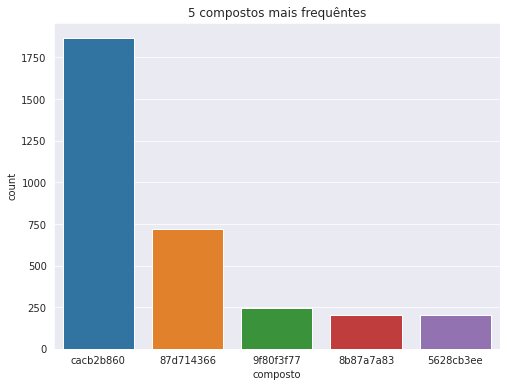

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='composto',
                   data=data.query('composto in @drugs_frequency'),
                   order=drugs_frequency)

ax.set_title('5 compostos mais frequêntes')

<center>Análise por histograma

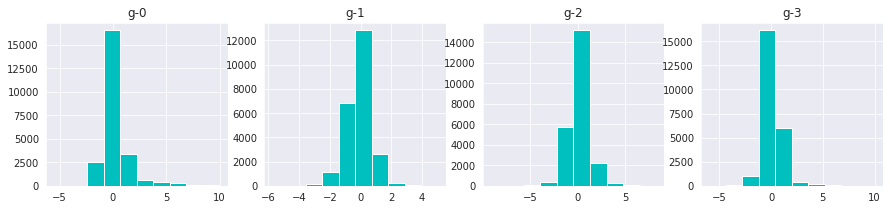

In [ ]:
plt.figure(figsize=(15, 3))
for count in range(4):
    ax = plt.subplot(1, 4, count + 1)
    ax.hist(data[f'g-{count}'], color='c')
    ax.set_title(data[f'g-{count}'].name)

<center> análise por histograma das expressões genéticas

In [ ]:
data.loc[:, 'g-1':'g-771'].describe().T.head()

,count,mean,std,min,25%,50%,75%,max
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
g-5,23814.0,-0.138836,1.179388,-10.000,-0.602225,-0.01565,0.510425,7.282


Text(0.5, 1.0, 'Média das linhagens celulares - c')

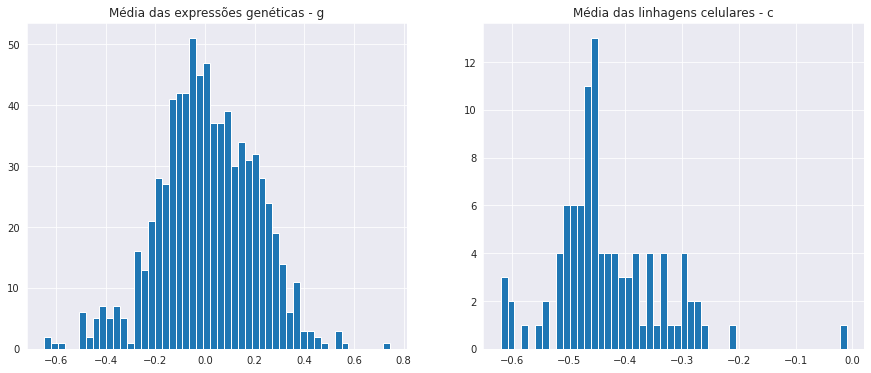

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(data.loc[:, 'g-1':'g-771'].describe().T['mean'], bins=50)
ax[0].set_title('Média das expressões genéticas - g')

ax[1].hist(data.loc[:, 'c-0':'c-99'].describe().T['mean'], bins=50)
ax[1].set_title('Média das linhagens celulares - c')

<center> boxplot das expressões genéticas em relação ao tratamento

Text(0.5, 1.0, 'Expressões genéticas em relação ao tratamento')

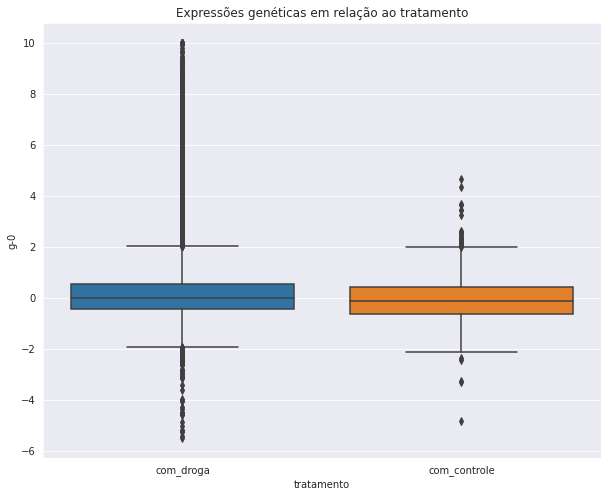

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='tratamento', y='g-0', data=data)
plt.title('Expressões genéticas em relação ao tratamento')

Podemos analisar que os pacientes com drogas tem muitos outliers

# Análises Estatísticas

## Crosstab

In [ ]:
# index = data.dose
# columns = data.tempo, data.tratamento
pd.crosstab([data.dose, data.tempo], data.tratamento, normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Pode-se analisar a frequência por index. Os dois tipos de dose foram aplicados 92% dos pacientes com droga e em 7% dos pacientes controle.

In [ ]:
# utilizando crosstab para analisar apenas um composto [g-0]
pd.crosstab([data.dose, data.tempo],
            data.tratamento,
            values=data['g-0'],
            aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

## Groupby

In [ ]:
data.groupby(['dose', 'tempo', 'tratamento']).mean()

g-0       g-1  ...      c-98      c-99
dose tempo tratamento                        ...                    
D1   24    com_controle -0.251760 -0.453322  ...  0.350566  0.342308
           com_droga     0.367996 -0.170839  ... -0.340809 -0.216371
     48    com_controle -0.122773 -0.453638  ...  0.408657  0.450673
           com_droga     0.412469 -0.142581  ... -0.634006 -0.389838
     72    com_controle -0.295271 -0.669059  ...  0.379652  0.319684
           com_droga     0.286250 -0.127878  ... -0.835132 -0.588545
D2   24    com_controle  0.010754 -0.229451  ...  0.134107  0.112021
           com_droga     0.115253 -0.081764  ... -0.254499 -0.187848
     48    com_controle  0.013174  0.001737  ...  0.232461  0.169539
           com_droga     0.214480 -0.001143  ... -0.485368 -0.317882
     72    com_controle  0.070250  0.133537  ...  0.200942  0.165440
           com_droga     0.253439  0.052840  ... -0.644784 -0.391018

[12 rows x 872 columns]

## Data View - Procurando por padrões entre os dados

Comparando dois tipos de expressões genéticas

In [ ]:
data[['g-0', 'g-3']].head()

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919


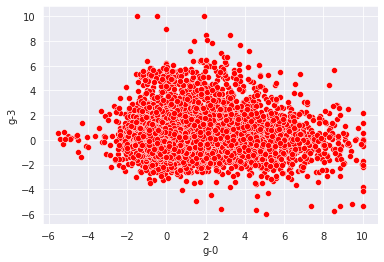

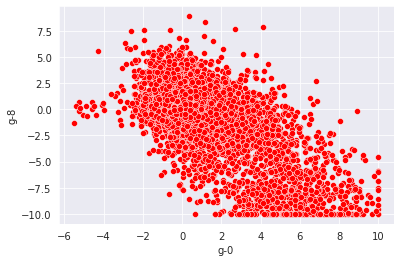

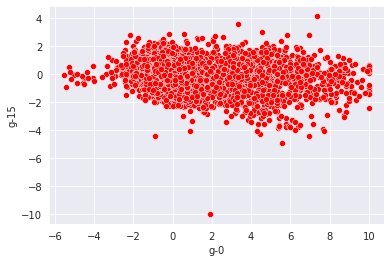

In [ ]:
plt.figure(0)
sns.scatterplot(x='g-0', y='g-3', data=data, color=['red'])
plt.figure(1)
sns.scatterplot(x='g-0', y='g-8', data=data, color=['red'])
plt.figure(2)
sns.scatterplot(x='g-0', y='g-15', data=data, color=['red'])

Há uma tendência de quanto maior for o g-0, menor o g-8.

<Figure size 432x288 with 0 Axes>

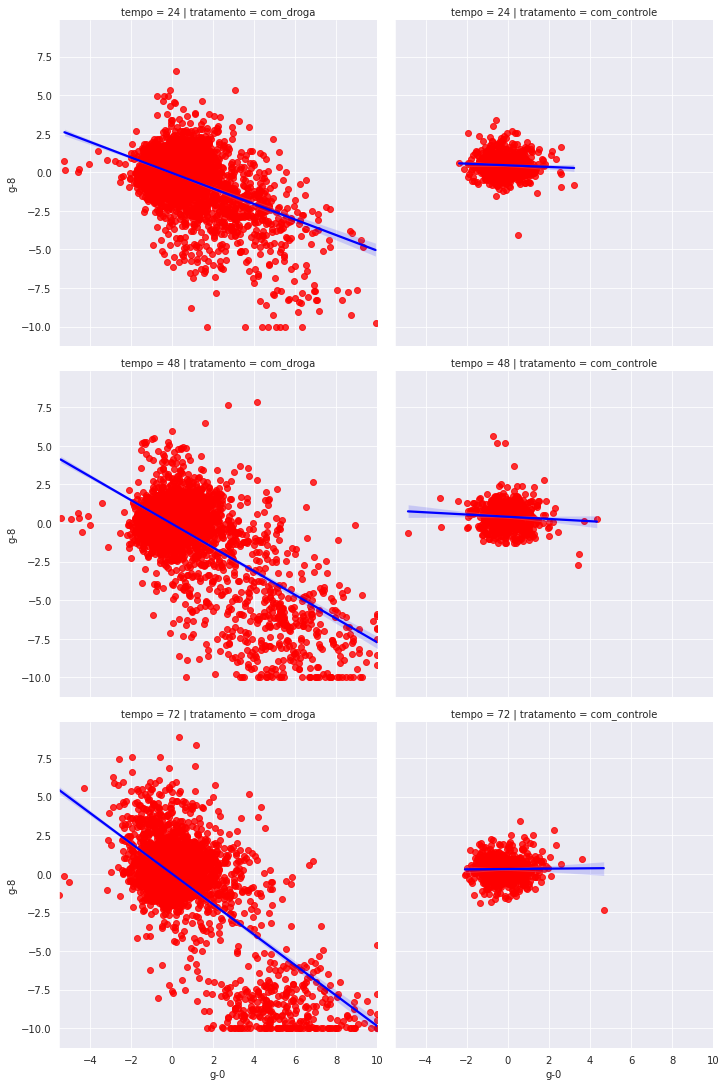

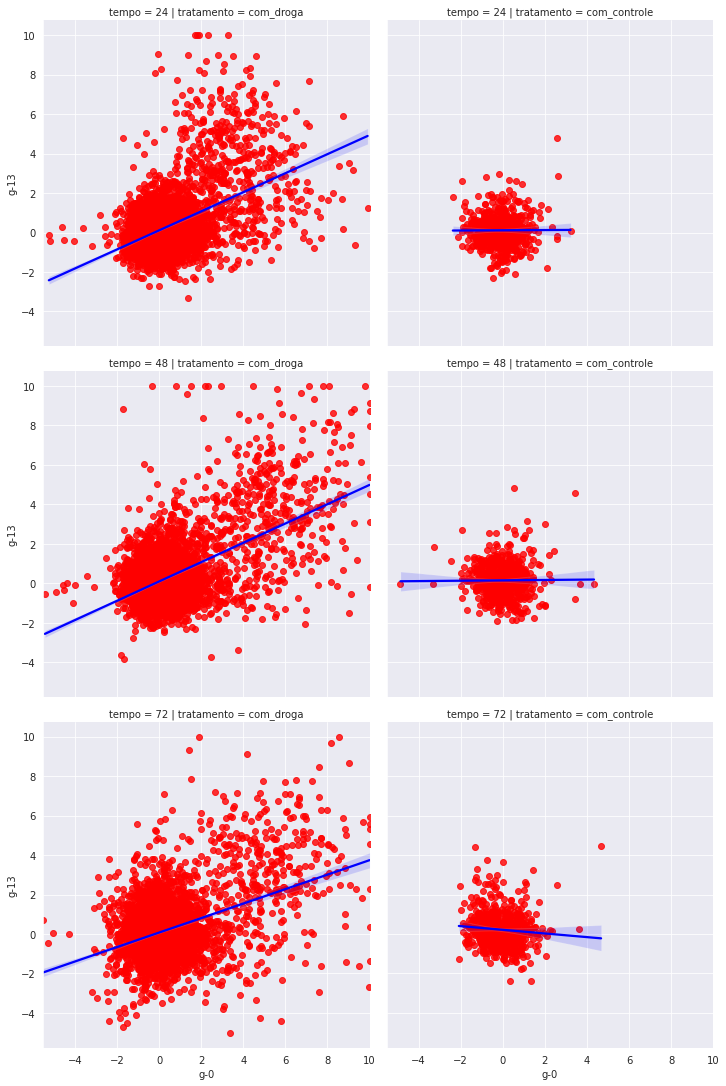

In [ ]:
# col = separa o gráfico em relação ao tratamento

plt.figure(0)
sns.lmplot(data=data,
           x='g-0',
           y='g-8',
           col='tratamento',
           row='tempo',
           scatter_kws={'color': 'red'},
           line_kws={'color': 'blue'})

plt.figure(1)
sns.lmplot(data=data,
           x='g-0',
           y='g-13',
           col='tratamento',
           row='tempo',
           scatter_kws={'color': 'red'},
           line_kws={'color': 'blue'})

Percebe-se que quanto maior o tempo, a linha vai se inclinando cada vez mais, permitindo analisar o efeito da droga. Para os pacientes controle, pode-se analisar que mantém um padrão, o que é esperado para este propósito.

## Correlação


Já percebemos que o comportamento das expressões genéticas varia pelo tipo de droga e pelo tempo de exposição. O próximo passo é analisar a correlação entre as expressões genéticas.

In [ ]:
data.loc[:, 'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

In [ ]:
# analisando a correlação entre os dados que já foram visualisados
data.loc[:, ['g-0', 'g-8']].corr()

,g-0,g-8
g-0,1.000000,-0.604212
g-8,-0.604212,1.000000


Confirmando os resultados, pode-se perceber que g-0 e g-8 são inversamente proporcionais. Por esse motivo, quanto maior o valor de g-0, menor o valor de g-8. Quanto maior o tempo de exposição, mais amostras concentravam no canto inferior direito do scatter plot.

**correlação por expressões:**

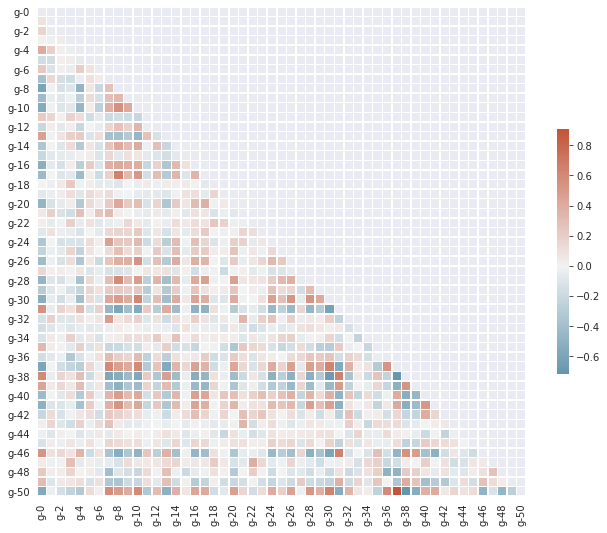

In [ ]:
# Compute the correlation matrix
corr_expressoes = data.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_expressoes, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_expressoes,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

g-50 e g-36 a g-38 apresentam uma correlação maior, vamos analisar:

<Figure size 432x288 with 0 Axes>

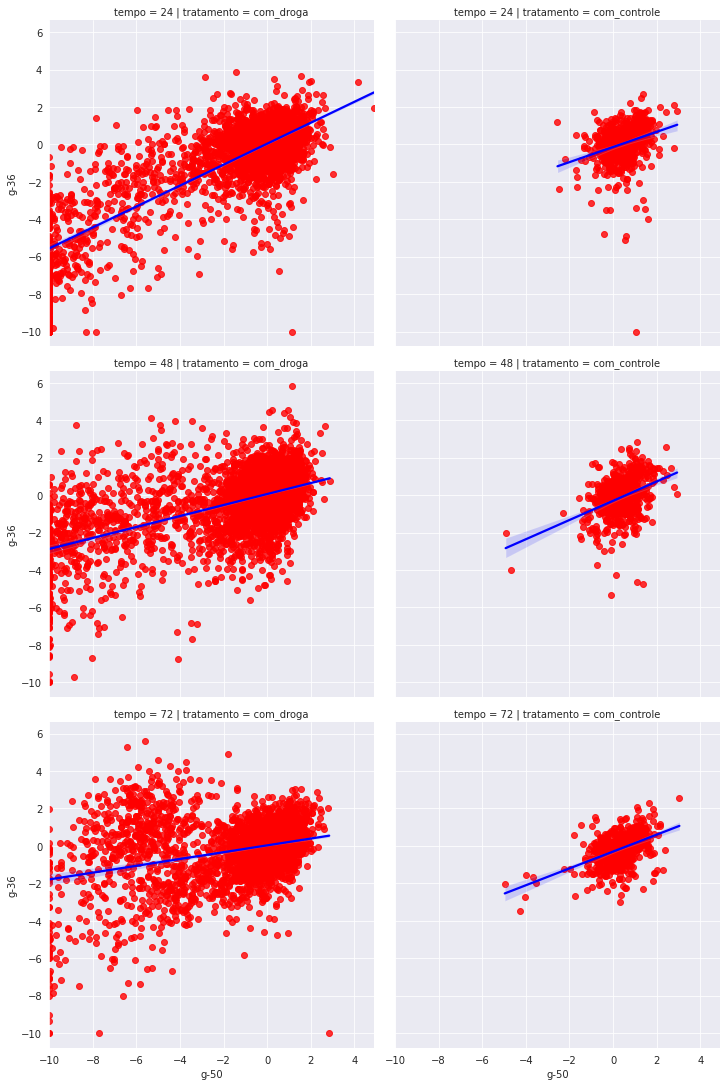

In [ ]:
plt.figure(0)
sns.lmplot(data=data,
           x='g-50',
           y='g-36',
           col='tratamento',
           row='tempo',
           scatter_kws={'color': 'red'},
           line_kws={'color': 'blue'})

Por mais correlacionadas que as variáveis estão, podemos afirmar que correlação não é causalidade. Posso ter uma alta correlação, porém não tem relação nenhuma sobre o comportamento da minha variável. Logo, uma expressão pode não alterar o aumento ou diminuição da outra.

**correlação por células sobreviventes:**

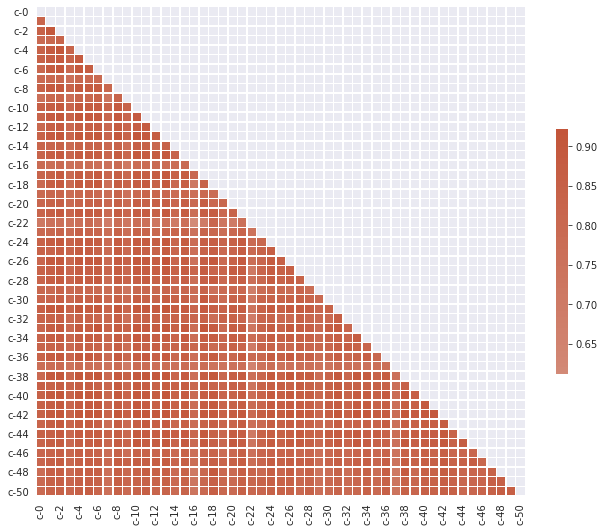

In [ ]:
# Compute the correlation matrix
corr_celulas = data.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celulas, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celulas,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

Os tipos celulares estão bem correlacionados com o conjunto de dados.

# Extração de dados referentes aos resultados

**Sobre o dataframe:**

Apresenta dados contendo os mecanismos de ação da droga. Esses mecanismos referem-se à interação bioquímica do composto (droga) com o alvo (célula, proteína de uma célula...).

Os mecanismos de ação trazem dois tipos de informação:
- alvo;
- ação sobre o alvo.

**Termos importantes:**
- dados agonistas ativam o receptor;
- dados antagonistas bloqueiam o receptor;

**Labels:**
- o mecanismo de ativação foi ativado: 1;
- o mecanismo de ativação não foi ativado: 0

In [ ]:
url_results = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'
data_results = pd.read_csv(url_results)
data_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## <center> Analisando as variáveis categóricas

In [ ]:
# selecionando apenas as colunas com variáveis do tipo int, faz a soma e ordena do maior para o menor
data_results.select_dtypes('int').sum().sort_values(ascending=False)

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

<center>top 10 das ações (inibidor, agonista...)

In [ ]:
def get_top_features(df, n=10, feature=''):
    top = df.iloc[:, df.columns.str.contains(feature)]
    top_series = pd.DataFrame(top.sum().sort_values(ascending=False)[:n]).T
    ax = top_series.plot.bar(xlabel=f'types of {feature}')
    ax.legend(loc='center left', bbox_to_anchor=(1, .5))
    plt.title(f'feature:{feature}')
    plt.show()
    return

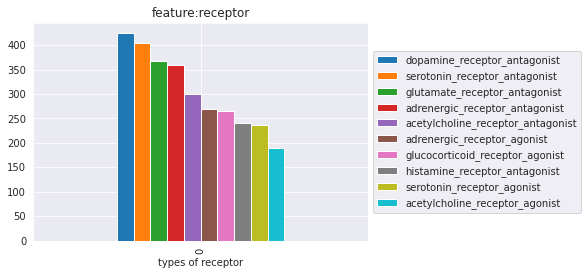

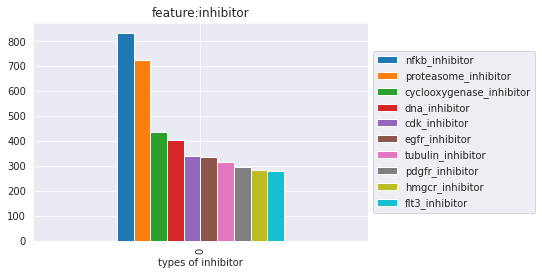

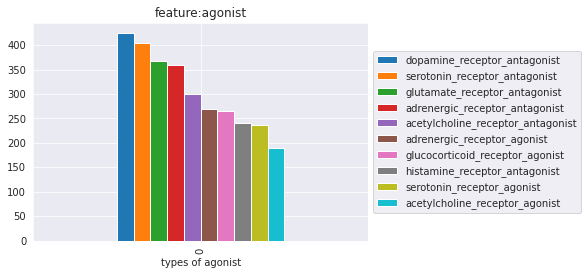

In [ ]:
get_top_features(data_results, feature='receptor')
get_top_features(data_results, feature='inhibitor')
get_top_features(data_results, feature='agonist')

## Merge

<center> algum controle ativou os mecanismos de ação? O esperado é que nenhum controle ative esses mecanismos.

Para solucionar este problema, precisamos unir as base de dados, para obter a informação do tratamento do paciente que está em outro dataframe

In [ ]:
# quantidade de mecanismos ativos (1) por experimento
data_results['n_moa'] = data_results.drop('id', axis=1).sum(axis=1)
data_results['moa_ativos'] = (data_results['n_moa'] != 0)
data_results.replace({True:1}, inplace=True)
data_results.replace({False:0}, inplace=True)

In [ ]:
data_results.head(3)

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,moa_ativos
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1


levando apenas o número de moas ativos para a função merge

In [ ]:
data_merged = pd.merge(data, data_results[['id', 'n_moa', 'moa_ativos']], on='id')
data_merged.head(3)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,moa_ativos
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1


## Análise entre compostos e genes

In [ ]:
# verificando se, para os pacientes com controle, há algum mecanismo de ação.
data_merged.query('tratamento == "com_controle"').moa_ativos.value_counts()

0    1866
Name: moa_ativos, dtype: int64

In [ ]:
# verificando se, para os pacientes com droga ativaram algum mecanismo de ação.
data_merged.query('tratamento == "com_droga"').moa_ativos.value_counts()

1    14447
0     7501
Name: moa_ativos, dtype: int64

<center>  selecionando os compostos mais utilizados e analisando nos genes

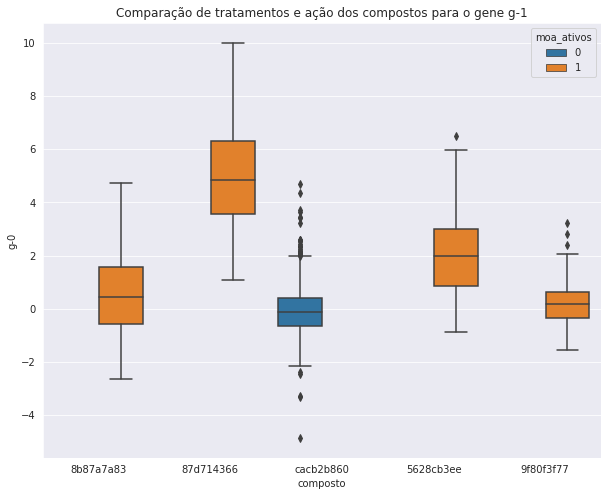

In [ ]:
# selecionando os compostos mais utilizados
composto_principal = data_merged.composto.value_counts().index[:5]

plt.figure(figsize=(10, 8))
sns.boxplot(data=data_merged.query('composto in @composto_principal'),
            y='g-0',
            x='composto',
            
            # colore e cria uma legenda baseada na coluna 'moa_ativos'
            hue='moa_ativos');
plt.title('Comparação de tratamentos e ação dos compostos para o gene g-1');
#plt.xticks(rotation=0);

# Machine Learning

Insights:
1. Cada padrão de expressão gênica e da viabilidade celular apresentam valores que estabelecem se um mecanismo de ativação será ativado ou não. Um modelo de classificação binária permite passar uma assinatura celular qualquer como entrada e determinar se ela será ativada ou não.

In [ ]:
data_merged.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,moa_ativos
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,1


In [ ]:
data_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,moa_ativos
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


## Regressão Logistica 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from ipywidgets import interact

In [ ]:
X = data_merged.select_dtypes('float')
y = data_merged.moa_ativos

In [ ]:
y.value_counts(normalize=True)

1    0.60666
0    0.39334
Name: moa_ativos, dtype: float64

### Divisão e estratificação dos dados

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(19051, 872)
(19051,)
(4763, 872)
(4763,)


In [ ]:
model_logistic = LogisticRegression(max_iter=2000)
model_logistic.fit(X_train,y_train)
print('Train score', model_logistic.score(X_train, y_train))
print('  Val score', model_logistic.score(X_val, y_val))

Train score 0.6759750144349378
  Val score 0.6330044089859332


Dummy classifier: utilizando o parâmetro most frequent, o modelo pega a classe mais frequênte e faz a inferência.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

model_dummy = DummyClassifier('most_frequent')
model_dummy.fit(X_train, y_train)

val_pred = model_dummy.predict(X_val)
accuracy_score(y_val, val_pred)

0.6067604450976275

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = data_merged.select_dtypes('float')
y = data_merged.moa_ativos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(19051, 872)
(19051,)
(4763, 872)
(4763,)


In [ ]:
@interact(max_dep=(1,20,1))
def train_tree(max_dep):
  global model_tree
  model_tree = DecisionTreeClassifier(max_depth=max_dep)
  model_tree.fit(X_train, y_train)
  print('Training...')
  print('Train score', model_tree.score(X_train, y_train))
  print('  Val score', model_tree.score(X_val, y_val))

interactive(children=(IntSlider(value=10, description='max_dep', max=20, min=1), Output()), _dom_classes=('wid…

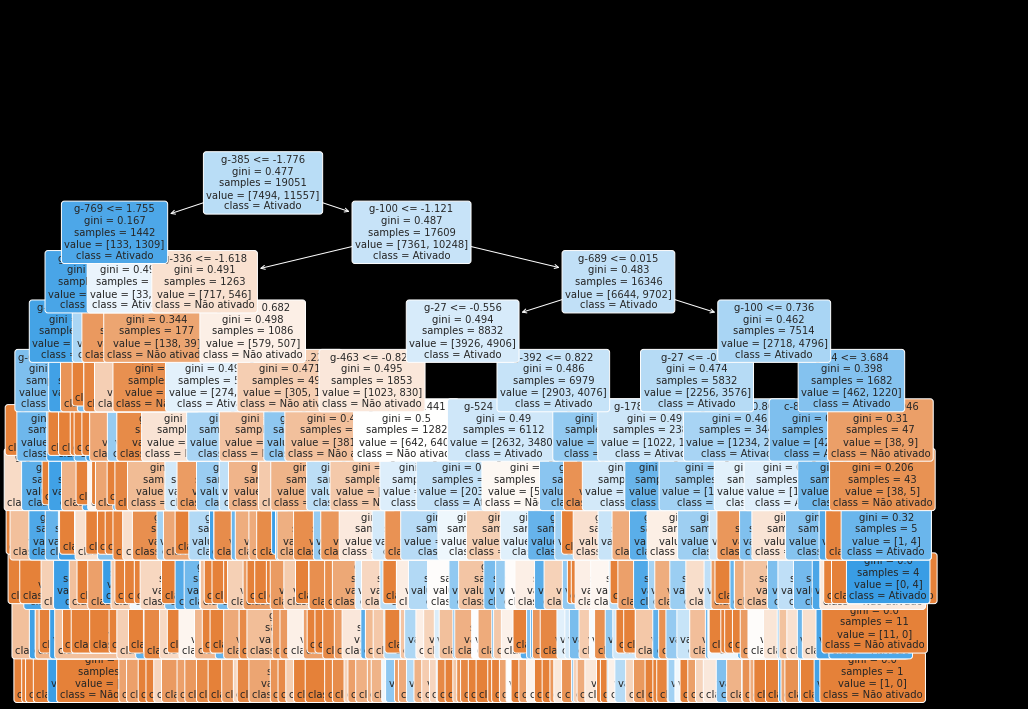

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')

tree.plot_tree(model_tree,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=X_train.columns,
               class_names=['Não ativado', 'Ativado']);
plt.tight_layout()

In [ ]:
def train_trees(X_train, y_train, X_val, y_val, min_depth=1, max_depth=5):

  train_results = []
  val_results = []

  for c in range(min_depth, max_depth+1):
    model_tree = DecisionTreeClassifier(max_depth=c)
    model_tree.fit(X_train, y_train)
    train_results.append(model_tree.score(X_train, y_train))
    val_results.append(model_tree.score(X_val, y_val))

  sns.lineplot(x=range(min_depth, max_depth+1), y=val_results, label='validation')
  sns.lineplot(x=range(min_depth, max_depth+1), y=train_results, label='train')
  plt.title(f'Resultados')
  return

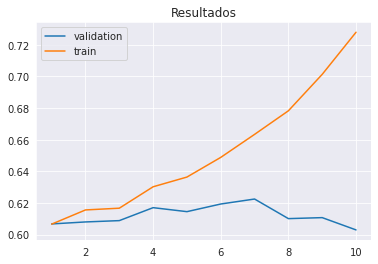

In [ ]:
train_trees(X_train, y_train, X_val, y_val, min_depth=1, max_depth=10)

Claramente está ocorrendo overfitting. O próximo passo é solucionar este 

problema.

## Adicionando novos dados para analisar os resultados:

In [ ]:
# alguns dados em string serão adicionados, para isso necessita-se de transforma-los em dummies
# exemplo:
pd.get_dummies(data_merged['tratamento']).head()

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Validando com os novos dados

### Regressão Logística

In [ ]:
X = data_merged.drop(['id', 'n_moa', 'moa_ativos', 'composto'], axis=1)
X = pd.get_dummies(X, columns = ['tratamento', 'tempo', 'dose'])

y = data_merged.moa_ativos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

model_logistic = LogisticRegression(max_iter=2000)
model_logistic.fit(X_train,y_train)
print('Train score', model_logistic.score(X_train, y_train))
print('  Val score', model_logistic.score(X_val, y_val))

(19051, 879)
(19051,)
(4763, 879)
(4763,)
Train score 0.7085192378352843
  Val score 0.6754146546294353


## Decision Tree

(19051, 879)
(19051,)
(4763, 879)
(4763,)


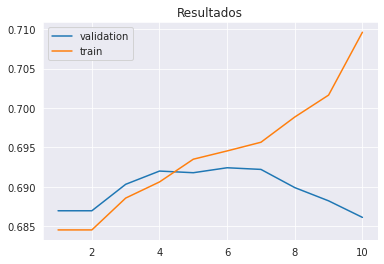

In [ ]:
# acrescentando novas colunas
X = data_merged.drop(['id', 'n_moa', 'moa_ativos', 'composto'], axis=1)
X = pd.get_dummies(X, columns = ['tratamento', 'tempo', 'dose'])

y = data_merged.moa_ativos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


train_trees(X_train, y_train, X_val, y_val, min_depth=1, max_depth=10)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# acrescentando novas colunas
X = data_merged.drop(['id', 'n_moa', 'moa_ativos', 'composto'], axis=1)
X = pd.get_dummies(X, columns = ['tratamento', 'tempo', 'dose'])

y = data_merged.moa_ativos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)
print('Training...')
print('Train score', model_forest.score(X_train, y_train))
print('  Val score', model_forest.score(X_val, y_val))

(19051, 879)
(19051,)
(4763, 879)
(4763,)
Training...
Train score 1.0
  Val score 0.6875918538736091
